In [1]:

import matplotlib.pyplot as plt
from data_preparation.basics import load_tdc_dataset_split, plot_counts
from data_preparation.descriptors import calculate_descriptors, extract_null

from rdkit import Chem

import pandas as pd
pd.set_option('display.max_rows', 20)

tasks = ['CYP2C19', 'CYP2D6', 'CYP3A4', 'CYP1A2', 'CYP2C9']

In [2]:
task = 'CYP2D6'
data = load_tdc_dataset_split(task)

Found local copy...
Loading...
Done!


# Data Exploration

In [3]:
data['train']

,Drug_ID,Drug,Y
0,1960010.0,CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21,0
1,644675.0,CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1,0
2,644890.0,COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1,1
3,645063.0,CC(=O)Nc1cccc(NC(=O)C2CCCN2C(=O)Nc2ccccc2C)c1,0
4,6602688.0,Br.N=c1n(CCN2CCOCC2)c2ccccc2n1CC(=O)c1ccc(Cl)c...,1
...,...,...,...
9186,16758815.0,C=CC1=C[C@@H](O)[C@@H]2O[C@@H]2C12OCCCO2,0
9187,16758816.0,O=C1[C@H]2CC=C3[C@@H]([C@H](O)[C@H]4O[C@@H]4C3...,0
9188,16758817.0,CCN1C(=O)[C@H]2CC=C3[C@@H]([C@H](O)[C@H]4O[C@@...,0
9189,16758818.0,C[C@H](c1ccccc1)N1C(=O)[C@@H]2[C@@H](CC[C@@H]3...,0


In [4]:
data['valid']

,Drug_ID,Drug,Y
0,9563178.0,O=C(CC(=O)NC1CCCCC1)N/N=C/c1ccc(Cl)cc1,0
1,3247118.0,COC(=O)[C@@]1(Cc2ccc(F)cc2)[C@H]2c3cc(C(=O)N4C...,0
2,238322.0,CC(C)CNCCc1ccccn1,0
3,16758741.0,CCN1C(=O)[C@H]2CC[C@@H]3/C(=N\NC(=O)OCc4ccc(OC...,0
4,1471492.0,CSc1c(-c2ccccc2)nc2ccc(Cl)cc2c1C(=O)O,0
...,...,...,...
1308,3233913.0,O=C(c1cnccn1)N1CCC2(CC1)CN(C(c1ccccc1)c1ccccc1)C2,1
1309,688084.0,CNC[C@H](O)c1ccc(O)c(OC)c1,0
1310,3247345.0,COC(=O)[C@H]1C[C@@H]1[C@H](NC(=O)c1cnccn1)c1cc...,0
1311,3235442.0,CN1CCN(c2ncc3nc(-c4ccc(Cl)cc4)c(=O)n(C4CC4)c3n...,0


In [5]:
data['test']

,Drug_ID,Drug,Y
0,701727.0,Cc1cccc(NC(N)=S)c1,0
1,854067.0,CNC[C@H](O)c1ccc(O)cc1,0
2,1295977.0,O=C(c1ccc([N+](=O)[O-])cc1)n1nc(-c2ccccc2)nc1N...,0
3,135403622.0,CN(C)C=O.O=C(Nc1nn[nH]n1)c1nc(-c2ccccc2)cc(=O)...,0
4,656095.0,COc1ccc(C2C(C(=O)N3CCOCC3)=C(C)NC3=C2C(=O)CC(C...,0
...,...,...,...
2621,3234488.0,O=c1c(-c2cc(F)cc(F)c2)nc2cncnc2n1Cc1ccccc1,0
2622,5310704.0,Cc1ccc(C2/C(=C(/O)c3ccc(Cl)cc3)C(=O)C(=O)N2CC2...,0
2623,1113795.0,COc1ccc(-c2cc(C(F)(F)F)n3nc(C(=O)NCc4ccco4)c(C...,0
2624,2999101.0,CCc1ccc(C2=Nn3c(nnc3-c3cccs3)SC2)cc1,1


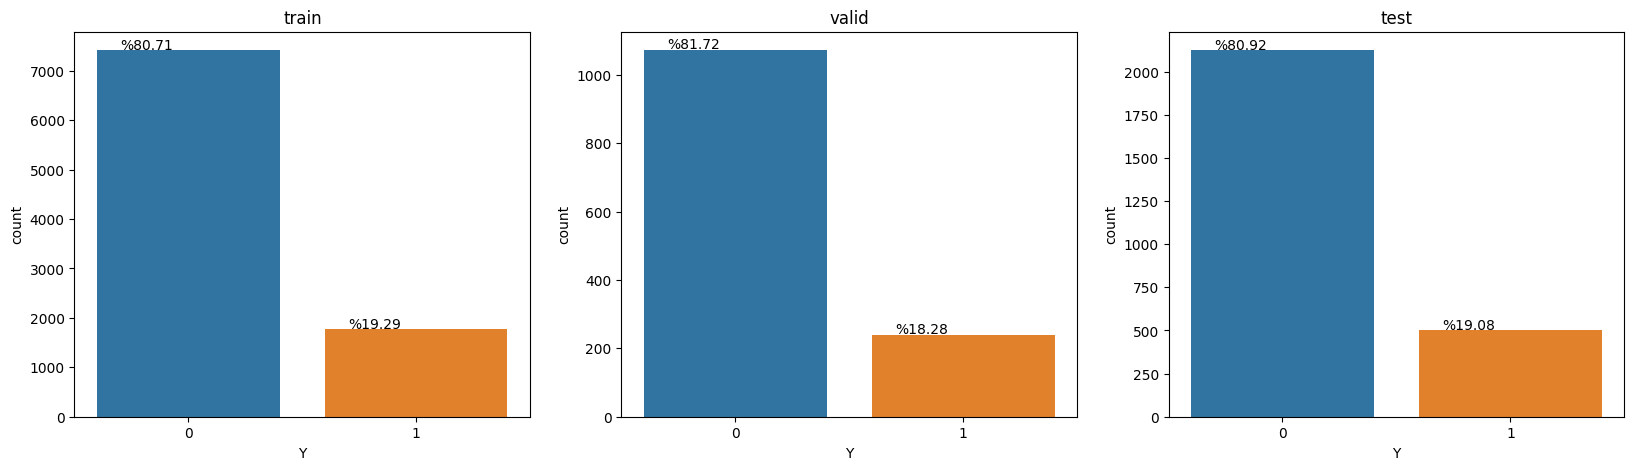

In [6]:
plot_counts([data['train']["Y"], data['valid']["Y"], data['test']["Y"]], ['train', 'valid', 'test'])